**Libraries**

In [41]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import (
    accuracy_score, 
    precision_score, 
    recall_score, 
    confusion_matrix, 
    ConfusionMatrixDisplay
)

**Data**

In [42]:
data_dict = {
    'Student_ID': [1, 2, 3, 4, 5, 5, 6, 7, 8],             # Note: '5' is a Duplicate
    'Age': ['20', '21', '19', '22', '20', '20', '21', '20', '99'], # '99' is an Outlier, '20' is a string
    'Exam_Score': [85, 92, 78, np.nan, 88, 88, 95, 70, 82], # One NaN gap
    'Study_Hours': [2, 10, 1, 15, 5, 5, 12, 4, 6],         # Small scale (1-15)
    'Income_USD': [0, 500, 100, 1200, 300, 300, 2000, 0, 150], # Large scale (0-2000)
    'Passed': ['Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes'] # Categorical
}

df = pd.DataFrame(data_dict)
print(df)

   Student_ID Age  Exam_Score  Study_Hours  Income_USD Passed
0           1  20        85.0            2           0    Yes
1           2  21        92.0           10         500    Yes
2           3  19        78.0            1         100     No
3           4  22         NaN           15        1200    Yes
4           5  20        88.0            5         300    Yes
5           5  20        88.0            5         300    Yes
6           6  21        95.0           12        2000    Yes
7           7  20        70.0            4           0     No
8           8  99        82.0            6         150    Yes


**Visualization**

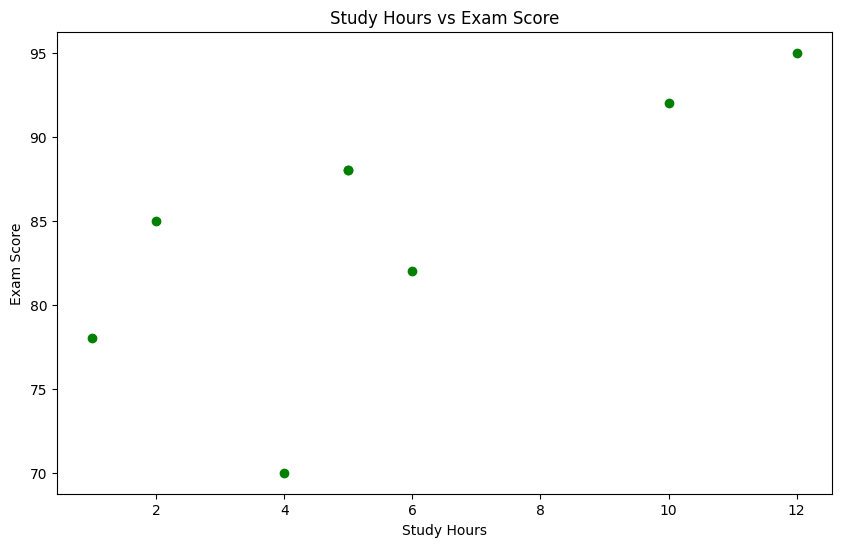

In [43]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Study_Hours'], df['Exam_Score'], color='green')
plt.xlabel('Study Hours') 
plt.ylabel('Exam Score')
plt.title('Study Hours vs Exam Score')
plt.show()

**Values**

In [44]:
mean_score = df['Exam_Score'].mean()
print(f"Mean Exam Score: {mean_score:.2f}")
mode_score = df['Exam_Score'].mode()[0]
print(f"Mode Exam Score: {mode_score}")
median_score = df['Exam_Score'].median()
print(f"Median Exam Score: {median_score}")

Mean Exam Score: 84.75
Mode Exam Score: 88.0
Median Exam Score: 86.5


Text(0, 0.5, 'Frequency')

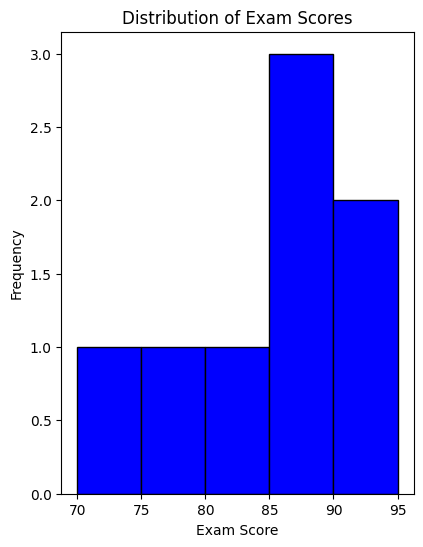

In [45]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)    
plt.hist(df['Exam_Score'].dropna(), bins=5 , color='blue', edgecolor='black')
plt.title('Distribution of Exam Scores')
plt.xlabel('Exam Score')
plt.ylabel('Frequency')

In [46]:
df.describe()

,Student_ID,Exam_Score,Study_Hours,Income_USD
count,9.000000,8.000000,9.000000,9.000000
mean,4.555556,84.750000,6.666667,505.555556
std,2.297341,8.013382,4.690416,671.027405
min,1.000000,70.000000,1.000000,0.000000
25%,3.000000,81.000000,4.000000,100.000000
50%,5.000000,86.500000,5.000000,300.000000
75%,6.000000,89.000000,10.000000,500.000000
max,8.000000,95.000000,15.000000,2000.000000


**Pre-Processing**

In [47]:
# REMOVING DUPLICATES
# Sometimes data is recorded twice by mistake.
df = df.drop_duplicates()
print(f"\nRows after removing duplicates: {len(df)}")
print(df.head())


Rows after removing duplicates: 8
   Student_ID Age  Exam_Score  Study_Hours  Income_USD Passed
0           1  20        85.0            2           0    Yes
1           2  21        92.0           10         500    Yes
2           3  19        78.0            1         100     No
3           4  22         NaN           15        1200    Yes
4           5  20        88.0            5         300    Yes


In [48]:
# FIXING DATA TYPES (Casting) 
# We convert Age to actual numbers.
df['Age'] = pd.to_numeric(df['Age'])


# HANDLING OUTLIERS
# If a student is 99 years old in a freshman class, it's likely a mistake.
# We replace anything over age 30 with the Median age.
median_age = df['Age'].median()
df.loc[df['Age'] > 30, 'Age'] = median_age
print("\nAges after fixing outliers:")
print(df['Age'])


# FEATURE ENGINEERING (New from Old)
# Let's create a new column: "Effort_Score" 
# This is Study_Hours multiplied by Exam_Score.
# We fill the Exam_Score gap first so the math works.
df['Exam_Score'] = df['Exam_Score'].fillna(df['Exam_Score'].mean())
df['Effort_Score'] = df['Study_Hours'] * df['Exam_Score']
print("\nDataFrame after Feature Engineering:")
print(df.head())

# LABEL ENCODING (Words to Numbers)
# For binary categories (Yes/No), we use a Label Encoder.
# Yes becomes 1, No becomes 0.
le = LabelEncoder()
df['Passed_Encoded'] = le.fit_transform(df['Passed'])
print(df[['Passed', 'Passed_Encoded']])


Ages after fixing outliers:
0    20.0
1    21.0
2    19.0
3    22.0
4    20.0
6    21.0
7    20.0
8    20.5
Name: Age, dtype: float64

DataFrame after Feature Engineering:
   Student_ID   Age  Exam_Score  Study_Hours  Income_USD Passed  Effort_Score
0           1  20.0   85.000000            2           0    Yes    170.000000
1           2  21.0   92.000000           10         500    Yes    920.000000
2           3  19.0   78.000000            1         100     No     78.000000
3           4  22.0   84.285714           15        1200    Yes   1264.285714
4           5  20.0   88.000000            5         300    Yes    440.000000
  Passed  Passed_Encoded
0    Yes               1
1    Yes               1
2     No               0
3    Yes               1
4    Yes               1
6    Yes               1
7     No               0
8    Yes               1


C:\Users\smart fujitsu\AppData\Local\Temp\ipykernel_1876\1039457207.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '20.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['Age'] > 30, 'Age'] = median_age


**Scaling and Training**

In [49]:
y=df['Passed_Encoded']
# Scaling the numbers (so big Income doesn't take over small Study Hours)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[['Study_Hours', 'Income_USD']])


# We hide 20% of the data from the model to test it later.
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,y, test_size=0.25, random_state=42
)

print(f"Students used for learning: {len(X_train)}")
print(f"Students used for the 'Final Exam': {len(X_test)}")

# TRAINING THE MODEL
model = LogisticRegression()
model.fit(X_train, y_train)

Students used for learning: 6
Students used for the 'Final Exam': 2


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


**Prediction and Evaluation Metrics**

In [50]:
# Ask the model to guess the answers for the Test Set
y_pred = model.predict(X_test)

# Calculate the metrics from your presentation
acc = accuracy_score(y_test, y_pred)
pre = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

print(f"Accuracy (Total Grade):  {acc * 100:.2f}%")
print(f"Precision (Quality):     {pre * 100:.2f}%")
print(f"Recall (Search Score):   {rec * 100:.2f}%")

Accuracy (Total Grade):  100.00%
Precision (Quality):     100.00%
Recall (Search Score):   100.00%


**Confusion Matrix**

C:\Users\smart fujitsu\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


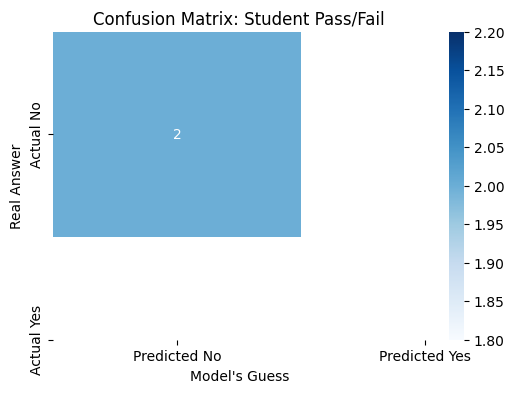

In [51]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted No', 'Predicted Yes'],
            yticklabels=['Actual No', 'Actual Yes'])
plt.title('Confusion Matrix: Student Pass/Fail')
plt.xlabel('Model\'s Guess')
plt.ylabel('Real Answer')
plt.show()